In [2]:
from scipy import *
import numpy as np
import WLanalysis
from matplotlib import pyplot

In [3]:
z_arr = arange(0.5,3,0.5)
Nz = len(z_arr)
eb_dir = 'stats_avg/output_eb_5000_s4/'
eb1k_dir = 'stats_avg_1k/output_eb_5000_s4/'
# alphabet = []
# for letter in range(97,123):
#     alphabet.append(chr(letter))

###### power spectrum
psI = array( [load(eb_dir+'ALL_igalXigal_z{0}_z{0}_10k.npy'.format(iz)) for iz in z_arr])
psN = array( [load(eb_dir+'ALL_galXgal_z{0}_z{0}_10k.npy'.format(iz)) for iz in z_arr])

psI5ka = array( [load(eb_dir+'ALL_igalXigal_z{0}_z{0}_5ka.npy'.format(iz)) for iz in z_arr])
psN5ka = array( [load(eb_dir+'ALL_galXgal_z{0}_z{0}_5ka.npy'.format(iz)) for iz in z_arr])
psI5kb = array( [load(eb_dir+'ALL_igalXigal_z{0}_z{0}_5kb.npy'.format(iz)) for iz in z_arr])
psN5kb = array( [load(eb_dir+'ALL_galXgal_z{0}_z{0}_5kb.npy'.format(iz)) for iz in z_arr])

psI1ks = array( [[load(eb1k_dir+'ALL_igalXigal_z{0}_z{0}_1k{1}.npy'.format(iz,ik)) for iz in z_arr] 
                 for ik in range(10)])

##### 1d PDF
pdf1dI = array([load(eb_dir+'ALL_igal_pdf_z{0}_sg1.0_10k.npy'.format(iz)) for iz in z_arr])
pdf1dN = array( [load(eb_dir+'ALL_gal_pdf_z{0}_sg1.0_10k.npy'.format(iz)) for iz in z_arr])

pdf1dI5ka = array( [load(eb_dir+'ALL_igal_pdf_z{0}_sg1.0_5ka.npy'.format(iz)) for iz in z_arr])
pdf1dN5ka = array( [load(eb_dir+'ALL_gal_pdf_z{0}_sg1.0_5ka.npy'.format(iz)) for iz in z_arr])
pdf1dI5kb = array( [load(eb_dir+'ALL_igal_pdf_z{0}_sg1.0_5kb.npy'.format(iz)) for iz in z_arr])
pdf1dN5kb = array( [load(eb_dir+'ALL_gal_pdf_z{0}_sg1.0_5kb.npy'.format(iz)) for iz in z_arr])

pdf1dI1ks = array( [[load(eb1k_dir+'ALL_igal_pdf_z{0}_sg1.0_1k{1}.npy'.format(iz,ik)) for iz in z_arr] 
                 for ik in range(10)])
pdf1dN1ks = array( [[load(eb1k_dir+'ALL_gal_pdf_z{0}_sg1.0_1k{1}.npy'.format(iz,ik)) for iz in z_arr] 
                 for ik in range(10)])

#### 2d PDF
pdf2dI = array( [load(eb_dir+'ALL_igalXigal_2dpdf_z{0}_z{1}_sg1.0_10k.npy'.format(z_arr[i],z_arr[j])) 
                 for i in range(Nz) for j in range(i+1,Nz)])
pdf2dN = array( [load(eb_dir+'ALL_galXgal_2dpdf_z{0}_z{1}_sg1.0_10k.npy'.format(z_arr[i],z_arr[j])) 
                 for i in range(Nz) for j in range(i+1,Nz)])

pdf2dI5ka = array( [load(eb_dir+'ALL_igalXigal_2dpdf_z{0}_z{1}_sg1.0_5ka.npy'.format(z_arr[i],z_arr[j])) 
                 for i in range(Nz) for j in range(i+1,Nz)])
pdf2dN5ka = array( [load(eb_dir+'ALL_galXgal_2dpdf_z{0}_z{1}_sg1.0_5ka.npy'.format(z_arr[i],z_arr[j])) 
                 for i in range(Nz) for j in range(i+1,Nz)])
pdf2dI5kb = array( [load(eb_dir+'ALL_igalXigal_2dpdf_z{0}_z{1}_sg1.0_5kb.npy'.format(z_arr[i],z_arr[j])) 
                 for i in range(Nz) for j in range(i+1,Nz)])
pdf2dN5kb = array( [load(eb_dir+'ALL_galXgal_2dpdf_z{0}_z{1}_sg1.0_5kb.npy'.format(z_arr[i],z_arr[j])) 
                 for i in range(Nz) for j in range(i+1,Nz)])

pdf2dI1ks = array( [[load(eb1k_dir+'ALL_igalXigal_2dpdf_z{0}_z{1}_sg1.0_1k{2}.npy'.format(z_arr[i],z_arr[j], ik)) 
                 for i in range(Nz) for j in range(i+1,Nz)] for ik in range(10)])
pdf2dN1ks = array( [[load(eb1k_dir+'ALL_galXgal_2dpdf_z{0}_z{1}_sg1.0_1k{2}.npy'.format(z_arr[i],z_arr[j], ik)) 
                 for i in range(Nz) for j in range(i+1,Nz)] for ik in range(10)])

In [4]:
print psI.shape, pdf1dI.shape, pdf2dI.shape, pdf2dN1ks.shape

(5, 101, 20) (5, 101, 27) (10, 101, 27, 27) (10, 10, 101, 27, 27)


In [5]:
ell = WLanalysis.edge2center(linspace(100,5000,21))
kcenter_gal = WLanalysis.edge2center(linspace(-3,5,28))
kcenter_cmb = WLanalysis.edge2center(linspace(-3,3,21))

ngal_arr = np.array([8.83, 13.25, 11.15, 7.36, 4.26])
Clnn =  array([0.3**2 / ngal / 1.18e7 for ngal in ngal_arr])

/Users/jia/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


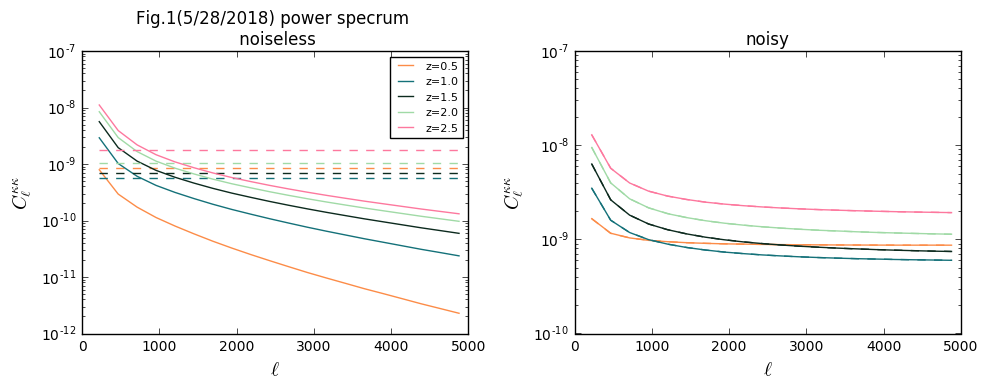

In [6]:
seed(45)
f, axes = subplots (1, 2, figsize=(10,4))
for i in range(5):
    icolor=rand(3)
    axes[0].plot(ell, psI[i,1],color=icolor,label='z=%s'%(z_arr[i]))
    axes[1].plot(ell, psN[i,1],color=icolor)#,label='z=%s'%(z_arr[i]))
    axes[0].plot(ell, ones(20)*Clnn[i],'--',color=icolor)#,label='z=%s(noise)'%(z_arr[i]))
    axes[1].plot(ell, psI[i,1]+Clnn[i],'--',color=icolor)
axes[0].set_title('Fig.1(5/28/2018) power specrum \n noiseless')
axes[1].set_title('noisy')
for ax in axes:
    ax.set_yscale('log')
    ax.set_xlabel('$\ell$',fontsize=14)
    ax.set_ylabel('$C_\ell^{\kappa\kappa}$',fontsize=14)
    ax.legend(fontsize=8,loc='best')
plt.tight_layout()
show()

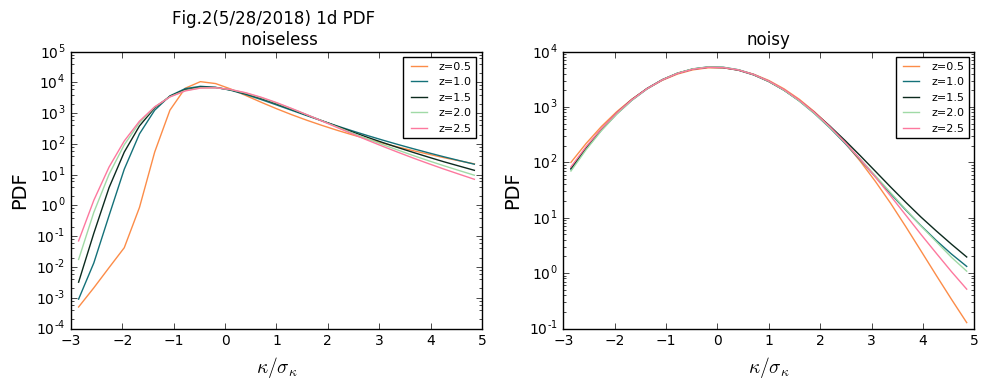

In [7]:
seed(45)
f, axes = subplots (1, 2, figsize=(10,4))
for i in range(Nz):
    icolor=rand(3)
    axes[0].plot(kcenter_gal, pdf1dI[i,1],color=icolor,label='z=%s'%(z_arr[i]))
    axes[1].plot(kcenter_gal, pdf1dN[i,1],color=icolor,label='z=%s'%(z_arr[i]))
axes[0].set_title('Fig.2(5/28/2018) 1d PDF \n noiseless')
axes[1].set_title('noisy')
for ax in axes:
    ax.set_yscale('log')
    ax.set_xlabel(r'$\kappa/\sigma_\kappa$',fontsize=14)
    ax.set_ylabel('PDF',fontsize=14)
    ax.legend(fontsize=8,loc='best')
plt.tight_layout()
show()

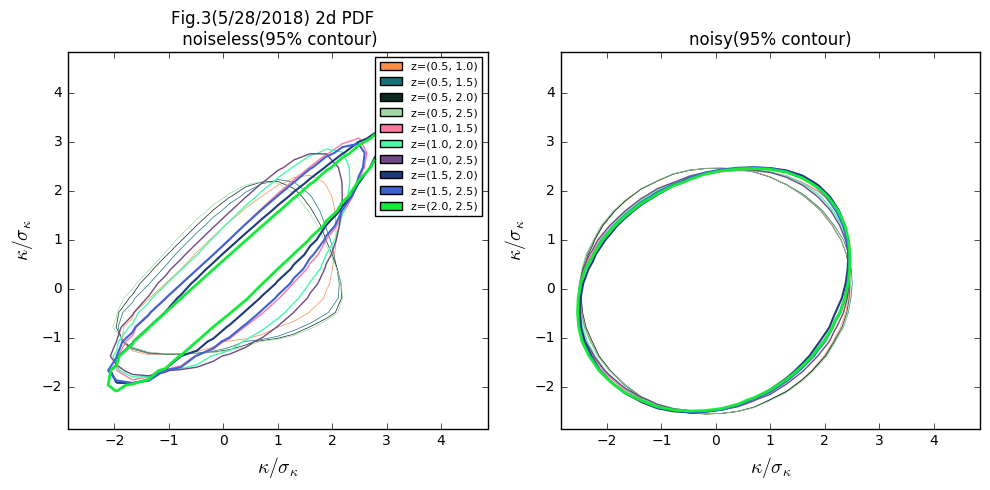

In [8]:
X, Y = meshgrid(kcenter_gal,kcenter_gal)
seed(45)
f, axes = subplots (1, 2, figsize=(10,5))
k=0
for i in range(Nz):
    for j in range(i+1,Nz):
        icolor=rand(3)  
        ilev0=WLanalysis.findlevel(pdf2dI[i,1])
        ilev1=WLanalysis.findlevel(pdf2dN[i,1])
        axes[0].contour(X, Y, pdf2dI[k,1], levels=[ilev0[1],], colors=[icolor,], linewidths=[i/2.0+0.5,])
        axes[1].contour(X, Y, pdf2dN[k,1], levels=[ilev1[1],], colors=[icolor,], linewidths=[i/2.0+0.5,])
        k+=1
seed(45)
proxy=[plt.Rectangle((0,0),1,1,ec=None, fc=rand(3)) for _i_ in range(10)]
ilabels=['z=(%.1f, %.1f)'%(z_arr[i],z_arr[j]) for i in range(Nz) for j in range(i+1,Nz)]
axes[0].legend(proxy, ilabels,loc='best',fontsize=8,ncol=1)
axes[0].set_title('Fig.3(5/28/2018) 2d PDF  \n noiseless(95% contour)')
axes[1].set_title('noisy(95% contour)')
for ax in axes:
    ax.set_xlabel(r'$\kappa/\sigma_\kappa$',fontsize=14)
    ax.set_ylabel(r'$\kappa/\sigma_\kappa$',fontsize=14)
plt.tight_layout()
show()

In [9]:
########## next test fisher contour from power spectrum

from matplotlib.patches import Ellipse

def plotEllipse(pos,P,edge,ls,ilabel,ax):
    '''plot the contour for covariance p
    where position is the center position
    p is the covariance [2,2] matirx'''
    U, s, Vh = svd(P) 
    orient = math.atan2(U[1,0],U[0,0])*180/pi
    ellipsePlot = Ellipse(xy=pos, width=2.0*math.sqrt(s[0]), 
                          height=2.0*math.sqrt(s[1]), angle=orient,edgecolor=edge, fill = 0, label=ilabel,ls=ls,linewidth=1)
    ax.add_patch(ellipsePlot)
    return ellipsePlot

def Fisher(covI, der):
    '''
    Input: 
    covariance inverse matrix (Nbin, Nbin)
    derivatives (Nparams, Nbin), where Nparams is the number of parameters 
    Return the Fisher matrix
    '''
    Nparams, Nbin = der.shape
    F = zeros( shape= (Nparams, Nparams))
    for i in range(Nparams):
        for j in range(Nparams):
            dA, dB = der[i], der[j]
            Mij = mat(dA).T*mat(dB) + mat(dB).T*mat(dA)  
            F [i,j]= 0.5*trace(covI*Mij)
    Ferr = real(sqrt(mat(F).I)) [range(Nparams), range(Nparams)]
    return F, Ferr

def Fisher2der(covI, der1, der2):
    '''
    Input: 
    covariance inverse matrix (Nbin, Nbin)
    derivatives (Nparams, Nbin), where Nparams is the number of parameters 
    skyscaling = area_sims / area_actual_survey = 12.25/2e4 for our sim and LSST
    Return the Fisher matrix
    '''
    Nparams, Nbin = der1.shape
    F = zeros( shape= (Nparams, Nparams))
    for i in range(Nparams):
        for j in range(Nparams):
            dA, dB = der1[i], der2[j]
            Mij = mat(dA).T*mat(dB) + mat(dB).T*mat(dA)  
            F [i,j]= 0.5*trace(covI*Mij)
    Ferr = real(sqrt(mat(F).I)) [range(Nparams), range(Nparams)]
    return F, Ferr

In [10]:
########### build covariance matrix
ebcov_dir = 'box5/output_eb_5000_s4/seed0/'
psI_cov = swapaxes(array( [load(ebcov_dir+'ALL_igalXigal_z{0}_z{0}.npy'.format(iz)) for iz in z_arr]),0,1).reshape(10000,-1)
psN_cov = swapaxes(array( [load(ebcov_dir+'ALL_galXgal_z{0}_z{0}.npy'.format(iz)) for iz in z_arr]),0,1).reshape(10000,-1)

covpsI = cov(psI_cov,rowvar=0)*12.25/2e4
covpsN = cov(psN_cov,rowvar=0)*12.25/2e4

covIpsI = mat(covpsI).I
covIpsN = mat(covpsN).I

print covpsI.shape, covpsN.shape
print psI_cov.shape, psN_cov.shape

(100, 100) (100, 100)
(10000, 100) (10000, 100)


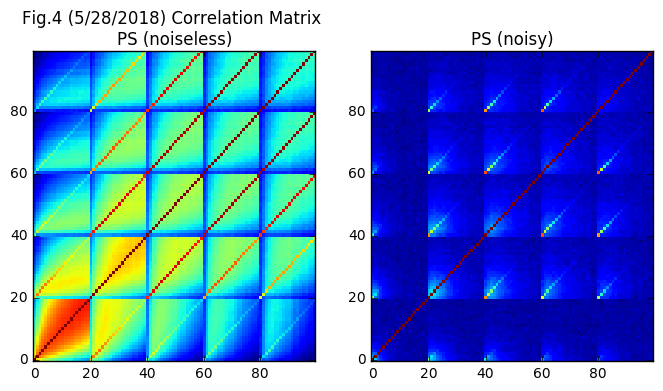

In [11]:
f, axes = subplots(1,2,figsize=(8,4))
axes[0].imshow(WLanalysis.corr_mat(covpsI), origin='lower',aspect='auto',interpolation='nearest')
axes[1].imshow(WLanalysis.corr_mat(covpsN), origin='lower',aspect='auto',interpolation='nearest')

axes[0].set_title('Fig.4 (5/28/2018) Correlation Matrix \nPS (noiseless)')
axes[1].set_title('PS (noisy)')
show()

(10, 5, 101, 20) (5, 101, 20) (5, 101, 20) (5, 20)


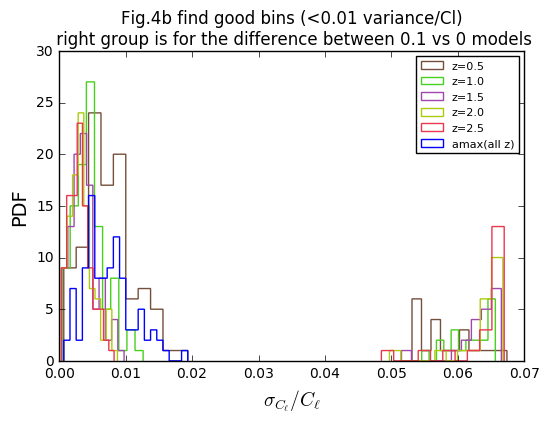

(80,)


In [12]:
psI1k_std = std(psI1ks,axis=0)
frac_diff = psI1k_std/psI[:,1].reshape(Nz,1,20)
idiff = psI[:,1]/psI[:,0]-1
print psI1ks.shape, psI1k_std.shape, frac_diff.shape, idiff.shape

f,ax=subplots(1,1,figsize=(6,4))
seed(35)
for i in range(Nz):
    icolor=rand(3)
    ax.hist(mean(frac_diff[i],axis=-1),histtype='step',bins=10, color=icolor, label='z=%s'%(z_arr[i]))
    ax.hist(abs(idiff[i]),histtype='step',bins=10, color=icolor)#, label='0.1-0eV fiducial')
ax.hist(amax(mean(frac_diff,axis=-1),axis=0), histtype='step',bins=20,label='amax(all z)')
ax.legend(fontsize=8,loc='best')
ax.set_title('Fig.4b find good bins (<0.01 variance/Cl)\n right group is for the difference between 0.1 vs 0 models')
ax.set_xlabel(r'$\sigma_{C_\ell} / C_\ell$',fontsize=14)
ax.set_ylabel('PDF',fontsize=14)
show()

idx_good = where(amax(mean(frac_diff,axis=-1),axis=0)<0.01)[0][1:]
print idx_good.shape

In [13]:
###### get derivatives
params = genfromtxt('cosmo_params_all.txt',usecols=[2,3,4])
fidu_params = array([0.1,0.3,2.1])

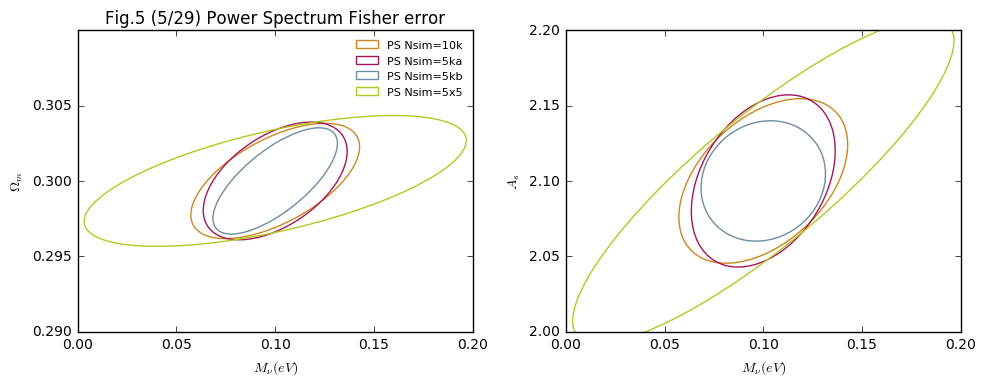

In [14]:
psI_flat, psI5ka_flat, psI5kb_flat = [swapaxes(ips,0,1).reshape(101,-1) for ips in [psI, psI5ka, psI5kb]]
psI1k_flats = [swapaxes(ips,0,1).reshape(101,-1) for ips in psI1ks]

ir = 0.2
dp = array([0.03, 0.3*ir, 2.1*ir])
Nparams=len(dp)
params_der = array([fidu_params+identity(3)*idp for idp in [dp/2,-dp/2]])
der_arr = []
interp_arr_PS = []
for istats in [psI_flat, psI5ka_flat, psI5kb_flat]:#+psI1k_flats:
    iinterp = WLanalysis.buildInterpolator(istats[idx_good], params[idx_good])
    ider = array([(iinterp(params_der[0][i]) - iinterp(params_der[1][i]))/dp[i] for i in range(3)])
    der_arr.append(ider)
    interp_arr_PS.append(iinterp)

Fisher_arr_PS = [Fisher(covIpsN, ider) for ider in der_arr]
Fisher_arr_PS += [Fisher2der(covIpsN, der_arr[1], der_arr[2]),]
# Fisher_arr_2der = [Fisher2der(covIpsN, der_arr[i], der_arr[i+1]) for i in range(3,12)]
# Fmean5k= mean(array( [Fisher_arr_2der[i][0] for i in range(len(Fisher_arr_2der))]),axis=0)
# Ferr5k = real(sqrt(mat(Fmean5k).I)) [range(Nparams), range(Nparams)]

# print 'Fisher error on [Mnu, omega_m, A_s], step size (%s)'%(ir)
# i=0
# for iF in Fisher_arr[:3]:
#     print iF[1]
#     i+=1

# print 'Fisher error with 2 different derivatives'
# print Ferr5k
# for iF in Fisher_arr_2der:
#     print iF[1]
#     i+=1

######### plot
lss='solid'
fnNsim=['10k','5ka', '5kb', '5x5']#]+['1k%s'%(i) for i in range(10)]
seed(999)
f, (ax1,ax2) = subplots(1,2,figsize=(10,4))
#Fisher_arr2 = Fisher_arr[:3]#+Fisher_arr_2der
for i in range(len(Fisher_arr_PS)):
    icolor = rand(3)
    iF = Fisher_arr_PS[i][0]
    plotEllipse(fidu_params[[0,1]], mat(iF).I[[0,1],:][:,[0,1]] ,icolor,lss,'PS Nsim=%s'%(fnNsim[i]),ax1)
    plotEllipse(fidu_params[[0,2]], mat(iF).I[[0,2],:][:,[0,2]] ,icolor,lss,'PS Nsim=%s'%(fnNsim[i]),ax2)

ax1.set_xlim(0., 0.2)
ax1.set_ylim(0.29, 0.31)
ax2.set_xlim(0., 0.2)
ax2.set_ylim(2., 2.2)

ax1.set_xlabel(r'$M_\nu(eV)$')
ax1.set_ylabel(r'$\Omega_m$')
ax2.set_xlabel(r'$M_\nu(eV)$')
ax2.set_ylabel(r'$A_s$')
ax1.legend(fontsize=8,frameon=0,ncol=1)
ax1.set_title('Fig.5 (5/29) Power Spectrum Fisher error')
#ax2.set_title('noisy covariance')
plt.tight_layout()
show()

In [15]:
######### test with chisq brute force grid
Na, Nb = 41,51
Mnu_arr = linspace(0.0, 0.2, Na)
Om_arr = linspace(0.29, 0.31, Nb)

chi2_arr = zeros(shape=(4,Na,Nb))

#psI_flat, psI5ka_flat, psI5kb_flat
for iNa in range(Na):
    for iNb in range(Nb): 
        idps10k = interp_arr_PS[0]((Mnu_arr[iNa], Om_arr[iNb], 2.1)) - psI_flat[1]
        idps5ka = interp_arr_PS[1]((Mnu_arr[iNa], Om_arr[iNb], 2.1)) - psI5ka_flat[1]
        idps5kb = interp_arr_PS[2]((Mnu_arr[iNa], Om_arr[iNb], 2.1)) - psI5kb_flat[1]
        
        chi2_arr[0, iNa, iNb] = float(mat(idps10k)*covIpsN*mat(idps10k).T) 
        chi2_arr[1, iNa, iNb] = float(mat(idps5ka)*covIpsN*mat(idps5ka).T) 
        chi2_arr[2, iNa, iNb] = float(mat(idps5kb)*covIpsN*mat(idps5kb).T) 
        chi2_arr[3, iNa, iNb] = float(mat(idps5ka)*covIpsN*mat(idps5kb).T) 

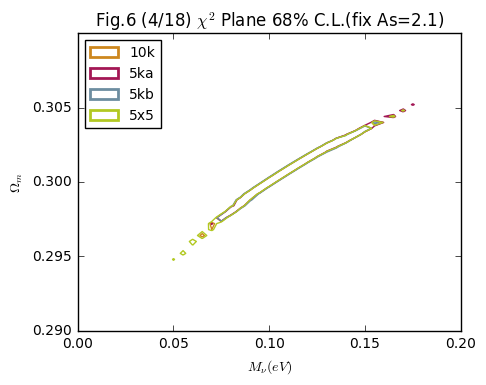

In [16]:
fnNsim=['10k','5ka', '5kb', '5x5']

seed(999)
X, Y = meshgrid(Mnu_arr, Om_arr)
f, ax  = subplots(1,1,figsize=(5,4))
for i in range(len(chi2_arr)):
    icolor=rand(3)  
    ichi = chi2_arr[i]
    ip = exp(-0.5*ichi).T
    il = sort(WLanalysis.findlevel(ip))
    ax.contour(X, Y, ip,levels=[il[-1],], origin='lower',aspect='auto',
               interpolation='nearest',colors=[icolor,],label=fnNsim[i],lw=0.5)

seed(999)
proxy=[plt.Rectangle((0,0),1,1,ec=rand(3), fc='w',lw=2) for _i_ in range(len(chi2_arr))]
ax.legend(proxy, fnNsim,loc='upper left',fontsize=10,ncol=1)

ax.set_xlabel(r'$M_\nu(eV)$')
ax.set_ylabel(r'$\Omega_m$')
ax.set_xlim(0., 0.2)
ax.set_ylim(0.29, 0.31)
ax.set_title('Fig.6 (4/18) $\chi^2$ Plane 68% C.L.(fix As=2.1)')
plt.tight_layout()
show()

In [17]:
print sum(pdf1dI[0,0]), (3.5*60)**2
print sum(pdf2dI[0,0]), (3.5*60)**2


43565.5483 44100.0
43523.5374 44100.0


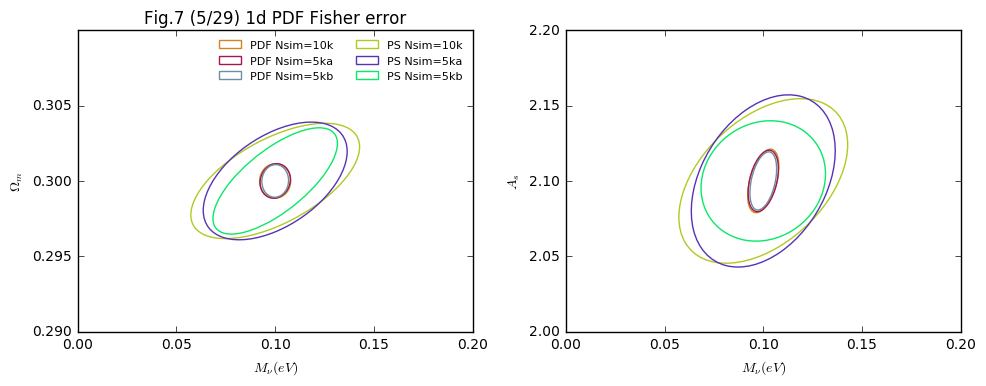

In [18]:
######### 1d PDF Fisher contour
#pdf1dI_flat, pdf1dI5ka_flat, pdf1dI5kb_flat
#pdf1dN_flat, pdf1dN5ka_flat, pdf1dN5kb_flat 
idxt=range(10, 20)#range(10,30)
pdf1dI_flats = [swapaxes(ips[:,:,idxt],0,1).reshape(101,-1) for ips in [pdf1dI, pdf1dI5ka, pdf1dI5kb]]
pdf1dN_flats= [swapaxes(ips[:,:,idxt],0,1).reshape(101,-1) for ips in [pdf1dN, pdf1dN5ka, pdf1dN5kb]]
pdf1dI1k_flats = [swapaxes(ips[:,:,idxt],0,1).reshape(101,-1) for ips in pdf1dI1ks]
pdf1dN1k_flats = [swapaxes(ips[:,:,idxt],0,1).reshape(101,-1) for ips in pdf1dN1ks]

pdf1dN_cov = swapaxes(array( [load(ebcov_dir+'ALL_gal_pdf_z{0}_sg1.0.npy'.format(iz))[:,idxt] for iz in z_arr]),0,1).reshape(10000,-1)
covpdf1dN = cov(pdf1dN_cov,rowvar=0)*12.25/2e4
covIpdf1dN = mat(covpdf1dN).I

pdf1dI_cov = swapaxes(array( [load(ebcov_dir+'ALL_igal_pdf_z{0}_sg1.0.npy'.format(iz))[:,idxt] for iz in z_arr]),0,1).reshape(10000,-1)
covpdf1dI = cov(pdf1dI_cov,rowvar=0)#*12.25/2e4
covIpdf1dI = mat(covpdf1dI).I

ir = 0.2
dp = array([0.03, 0.3*ir, 2.1*ir])
Nparams=len(dp)
params_der = array([fidu_params+identity(3)*idp for idp in [dp/2,-dp/2]])
der_arr_PDF = []
interp_arr_PDF = []
for istats in pdf1dN_flats:#+pdf1dI1k_flats[:2]:
    iinterp = WLanalysis.buildInterpolator(istats[idx_good], params[idx_good])
    ider = array([(iinterp(params_der[0][i]) - iinterp(params_der[1][i]))/dp[i] for i in range(3)])
    der_arr_PDF.append(ider)
    interp_arr_PDF.append(iinterp)
Fisher_arr = [Fisher(covIpdf1dN, ider) for ider in der_arr_PDF]
Fisher_arr+= [Fisher2der(covIpdf1dN, der_arr_PDF[1], der_arr_PDF[2]),]
# Fisher_arr_2der = [Fisher2der(covIpdf1dN, der_arr[i], der_arr[i+1]) for i in range(3,12)]
# Fmean5k= mean(array( [Fisher_arr_2der[i][0] for i in range(len(Fisher_arr_2der))]),axis=0)
# Ferr5k = real(sqrt(mat(Fmean5k).I)) [range(Nparams), range(Nparams)]

# ######### plot
lss='solid'
fnNsim=['10k','5ka', '5kb', '5x5']
seed(999)
f, (ax1,ax2) = subplots(1,2,figsize=(10,4))

for i in range(len(Fisher_arr)-1):
    icolor = rand(3)
    iF = Fisher_arr[i][0]
    plotEllipse(fidu_params[[0,1]], mat(iF).I[[0,1],:][:,[0,1]] ,icolor,lss,'PDF Nsim=%s'%(fnNsim[i]),ax1)
    plotEllipse(fidu_params[[0,2]], mat(iF).I[[0,2],:][:,[0,2]] ,icolor,lss,'PDF Nsim=%s'%(fnNsim[i]),ax2)

for i in range(len(Fisher_arr_PS)-1):
    icolor = rand(3)
    iF = Fisher_arr_PS[i][0]
    plotEllipse(fidu_params[[0,1]], mat(iF).I[[0,1],:][:,[0,1]] ,icolor,lss,'PS Nsim=%s'%(fnNsim[i]),ax1)
    plotEllipse(fidu_params[[0,2]], mat(iF).I[[0,2],:][:,[0,2]] ,icolor,lss,'PS Nsim=%s'%(fnNsim[i]),ax2)
    
ax1.set_xlim(0., 0.2)
ax1.set_ylim(0.29, 0.31)
ax2.set_xlim(0., 0.2)
ax2.set_ylim(2., 2.2)

ax1.set_xlabel(r'$M_\nu(eV)$')
ax1.set_ylabel(r'$\Omega_m$')
ax2.set_xlabel(r'$M_\nu(eV)$')
ax2.set_ylabel(r'$A_s$')
ax1.legend(fontsize=8,frameon=0,ncol=2)
ax1.set_title('Fig.7 (5/29) 1d PDF Fisher error')
plt.tight_layout()
show()

In [19]:
pdf1dI.shape, pdf1dI_flats[0].shape

((5, 101, 27), (101, 50))

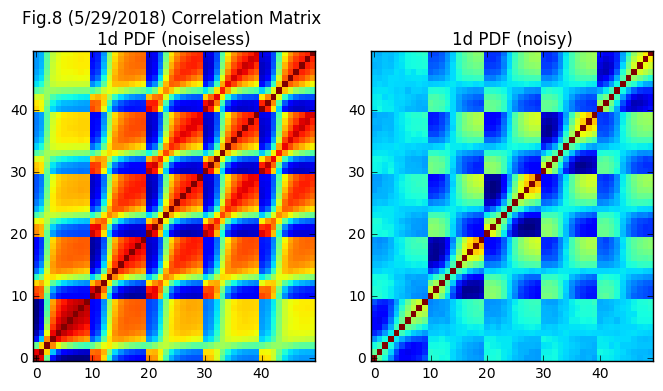

In [20]:
f, axes = subplots(1,2,figsize=(8,4))
axes[0].imshow(WLanalysis.corr_mat(covpdf1dI), origin='lower',aspect='auto',interpolation='nearest')
axes[1].imshow(WLanalysis.corr_mat(covpdf1dN), origin='lower',aspect='auto',interpolation='nearest')

axes[0].set_title('Fig.8 (5/29/2018) Correlation Matrix \n1d PDF (noiseless)')
axes[1].set_title('1d PDF (noisy)')
show()

In [21]:
######### test with chisq brute force grid
Na, Nb = 41,51
Mnu_arr = linspace(0.0, 0.2, Na)
Om_arr = linspace(0.29, 0.31, Nb)

chi2_arr_PDF = zeros(shape=(4,Na,Nb))

for iNa in range(Na):
    for iNb in range(Nb): 
        idps10k = interp_arr_PDF[0]((Mnu_arr[iNa], Om_arr[iNb], 2.1)) - pdf1dN_flats[0][1]
        idps5ka = interp_arr_PDF[1]((Mnu_arr[iNa], Om_arr[iNb], 2.1)) - pdf1dN_flats[1][1]
        idps5kb = interp_arr_PDF[2]((Mnu_arr[iNa], Om_arr[iNb], 2.1)) - pdf1dN_flats[2][1]
        
        chi2_arr_PDF[0, iNa, iNb] = float(mat(idps10k)*covIpdf1dN*mat(idps10k).T) 
        chi2_arr_PDF[1, iNa, iNb] = float(mat(idps5ka)*covIpdf1dN*mat(idps5ka).T) 
        chi2_arr_PDF[2, iNa, iNb] = float(mat(idps5kb)*covIpdf1dN*mat(idps5kb).T) 
        chi2_arr_PDF[3, iNa, iNb] = float(mat(idps5ka)*covIpdf1dN*mat(idps5kb).T) 

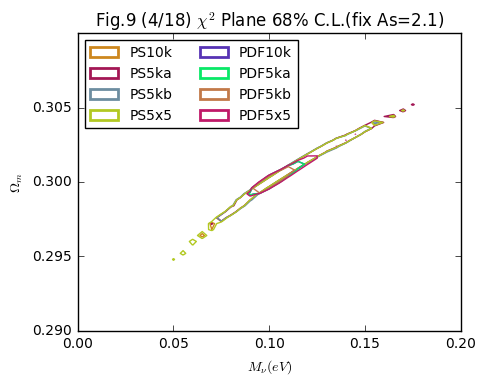

In [22]:
fnNsim=['10k','5ka', '5kb', '5x5']

seed(999)
X, Y = meshgrid(Mnu_arr, Om_arr)
f, ax  = subplots(1,1,figsize=(5,4))
for i in range(len(chi2_arr)):
    icolor=rand(3)  
    ichi = chi2_arr[i]
    ip = exp(-0.5*ichi).T
    il = sort(WLanalysis.findlevel(ip))
    ax.contour(X, Y, ip,levels=[il[-1],], origin='lower',aspect='auto',
               interpolation='nearest',colors=[icolor,],label='PS '+fnNsim[i],lw=0.5)

for i in range(len(chi2_arr_PDF)):
    icolor=rand(3)  
    ichi = chi2_arr_PDF[i]
    ip = exp(-0.5*ichi).T
    il = sort(WLanalysis.findlevel(ip))
    ax.contour(X, Y, ip,levels=[il[-1],], origin='lower',aspect='auto',
               interpolation='nearest',colors=[icolor,],label='PDF '+fnNsim[i],lw=0.5)
    
seed(999)
proxy=[plt.Rectangle((0,0),1,1,ec=rand(3), fc='w',lw=2) for _i_ in range(len(chi2_arr)+len(chi2_arr_PDF))]
ax.legend(proxy, [ips+ix for ips in ['PS', 'PDF'] for ix in fnNsim] ,loc='upper left',fontsize=10,ncol=2)

ax.set_xlabel(r'$M_\nu(eV)$')
ax.set_ylabel(r'$\Omega_m$')
ax.set_xlim(0., 0.2)
ax.set_ylim(0.29, 0.31)
ax.set_title('Fig.9 (4/18) $\chi^2$ Plane 68% C.L.(fix As=2.1)')
plt.tight_layout()
show()

In [23]:
######### 2d PDF Fisher contour
idxt2=where(pdf2dN[:,1]>5)
pdf2dN_flats= array([swapaxes(ips,0,1)[:,idxt2[0],idxt2[1],idxt2[2]] for ips in [pdf2dN, pdf2dN5ka, pdf2dN5kb]])

pdf2dN_cov = swapaxes(array( [load(ebcov_dir+'ALL_galXgal_2dpdf_z{0}_z{1}_sg1.0.npy'.format(z_arr[i],z_arr[j]))
                             for i in range(Nz) for j in range(i+1,Nz)]),0,1)[:,idxt2[0],idxt2[1],idxt2[2]]

covpdf2dN = cov(pdf2dN_cov,rowvar=0)*12.25/2e4
covIpdf2dN = mat(covpdf2dN).I

ir = 0.2
dp = array([0.03, 0.3*ir, 2.1*ir])
Nparams=len(dp)
params_der = array([fidu_params+identity(3)*idp for idp in [dp/2,-dp/2]])
der_arr_PDF2d = []
interp_arr_PDF2d = []
for istats in pdf2dN_flats:#+pdf1dI1k_flats[:2]:
    iinterp = WLanalysis.buildInterpolator(istats[idx_good], params[idx_good])
    ider = array([(iinterp(params_der[0][i]) - iinterp(params_der[1][i]))/dp[i] for i in range(3)])
    der_arr_PDF2d.append(ider)
    interp_arr_PDF2d.append(iinterp)
Fisher_arr_2d = [Fisher(covIpdf2dN, ider) for ider in der_arr_PDF2d]
Fisher_arr_2d+= [Fisher2der(covIpdf2dN, der_arr_PDF2d[1], der_arr_PDF2d[2]),]

In [24]:
print ips.shape, swapaxes(ips,0,1).shape,pdf2dN_flats.shape, pdf2dN_cov.shape

(10, 101, 27, 27) (101, 10, 27, 27) (3, 101, 3396) (10000, 3396)


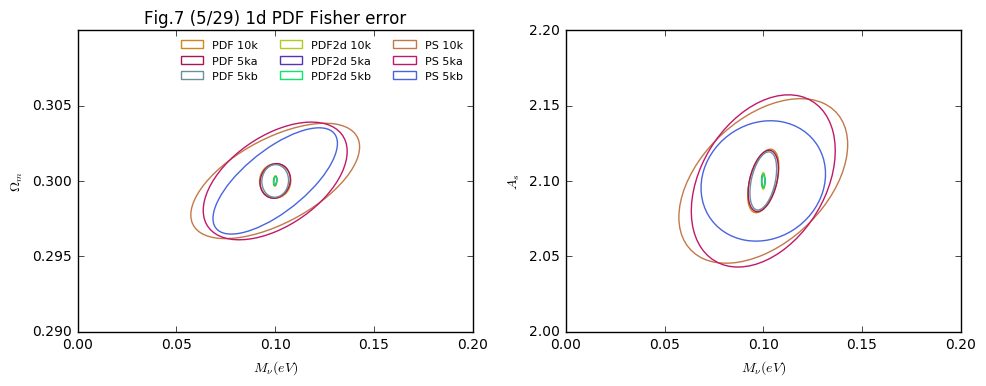

In [25]:
# ######### plot
lss='solid'
fnNsim=['10k','5ka', '5kb', '5x5']
seed(999)
f, (ax1,ax2) = subplots(1,2,figsize=(10,4))

for i in range(len(Fisher_arr)-1):
    icolor = rand(3)
    iF = Fisher_arr[i][0]
    plotEllipse(fidu_params[[0,1]], mat(iF).I[[0,1],:][:,[0,1]] ,icolor,lss,'PDF %s'%(fnNsim[i]),ax1)
    plotEllipse(fidu_params[[0,2]], mat(iF).I[[0,2],:][:,[0,2]] ,icolor,lss,'PDF %s'%(fnNsim[i]),ax2)

for i in range(len(Fisher_arr_2d)-1):
    icolor = rand(3)
    iF = Fisher_arr_2d[i][0]
    plotEllipse(fidu_params[[0,1]], mat(iF).I[[0,1],:][:,[0,1]] ,icolor,lss,'PDF2d %s'%(fnNsim[i]),ax1)
    plotEllipse(fidu_params[[0,2]], mat(iF).I[[0,2],:][:,[0,2]] ,icolor,lss,'PDF2d %s'%(fnNsim[i]),ax2)

for i in range(len(Fisher_arr_PS)-1):
    icolor = rand(3)
    iF = Fisher_arr_PS[i][0]
    plotEllipse(fidu_params[[0,1]], mat(iF).I[[0,1],:][:,[0,1]] ,icolor,lss,'PS %s'%(fnNsim[i]),ax1)
    plotEllipse(fidu_params[[0,2]], mat(iF).I[[0,2],:][:,[0,2]] ,icolor,lss,'PS %s'%(fnNsim[i]),ax2)
    
ax1.set_xlim(0., 0.2)
ax1.set_ylim(0.29, 0.31)
ax2.set_xlim(0., 0.2)
ax2.set_ylim(2., 2.2)

ax1.set_xlabel(r'$M_\nu(eV)$')
ax1.set_ylabel(r'$\Omega_m$')
ax2.set_xlabel(r'$M_\nu(eV)$')
ax2.set_ylabel(r'$A_s$')
ax1.legend(fontsize=8,frameon=0,ncol=3)
ax1.set_title('Fig.7 (5/29) 1d PDF Fisher error')
plt.tight_layout()
show()

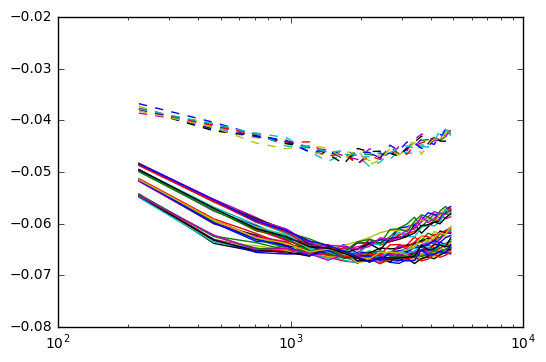

In [26]:
ps_icmb = array([load('stats_avg_1k/output_eb_5000_s4/ALL_icmbXicmb_1k%i.npy'%(i)) for i in range(10)])
f,ax=subplots(1,1,figsize=(6,4))
for i in range(10):
    ax.plot(ell, ps_icmb[i][1]/ps_icmb[i][0]-1,'--')#,label='cmb %s-%sk'%(i,i+1))
    for j in range(1,5):
        ax.plot(ell, psI1ks[i][j][1]/psI1ks[i][j][0]-1)#,label='z=2.5 %s-%sk'%(i,i+1))
ax.set_xscale('log')
ax.legend(fontsize=8,ncol=2)
ax.set_ylim(-0.08, -0.02)
show()

In [29]:
################# test PDF single redshift constraint
psI1 = psI[1]
